In [91]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import os

from datetime import datetime, timedelta

In [5]:
PATH = "../Data/"

In [12]:
[PATH + v for v in os.listdir(PATH)]

['../Data/Case 2018.csv',
 '../Data/Case 2019.csv',
 '../Data/Case 2020.csv',
 '../Data/Case 2021.csv',
 '../Data/Case 2022.csv',
 '../Data/Case 2023.csv',
 '../Data/Case 2024.csv']

In [ ]:
pd.read_csv([PATH + v for v in os.listdir(PATH)])[0]

In [105]:
DF = pd.read_csv("../Data/Case 2018.csv")

C:\Users\Maku\AppData\Local\Temp\ipykernel_6076\1038496334.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  DF = pd.read_csv("../Data/Case 2018.csv")


In [106]:
DF.head()

,CASE_NUMBER,CASE_TYPE,CASE_TYPE2,CASE_STATUS,REASON,ORIGIN,SUBJECT,PRIORITY,DESCRIPTION,RESOLUTION_COMMENT__C,...,ACCOUNT_SHIPPINGCOUNTRY,ULTIMATEPARENTACCOUNT_NUMBER,FEEDBACK_NAME,FEEDBACK_DATETIME,FEEDBACK_RATING,FEEDBACK_REOPEN,FEEDBACK_ISQUERYRESOLVED,FEEDBACK_EFFORTRATING,FEEDBACK_LANGUAGE,FEEDBACK_COMMENT
0,6498587,NaN,Incident,Closed,NaN,Phone,Where Do I Find The Employee Expense And Marke...,3-Low,Mohammed would like to know where to find the ...,I was able to verify that the employee expense...,...,United Kingdom,A-00756406,CF-00051561,2018-04-19 13:12:20.000 Z,9.0,No,Yes,Strongly Agree,English,NaN
1,6504399,NaN,Incident,Closed,NaN,Phone,Eikon Excel Assistance,3-Low,Client wants to know how he can export data fr...,Guided Tracy on how to use Eikon Excel Formula...,...,United States,A-00799887,CF-00051245,2018-04-18 04:34:25.000 Z,10.0,No,Yes,Strongly Agree,English,Sharon provided a few ways to address my probl...
2,6798897,NaN,Incident,Closed,NaN,Phone,Missing Addin in Eikon Excel.,3-Low,my excell sheet is disconnected from my spot f...,I sent Tracy instruction on how to add the Mis...,...,United States,A-00799887,CF-00068359,2018-07-31 15:59:19.000 Z,10.0,No,Yes,Strongly Agree,English,TR excel add it was disabled. Rep sent me a v...
3,6529379,Billing,Incident,Closed,NaN,Contact Us,<Update Bill-to contact for two accounts><EI u...,3-Low,<Update Bill-to contact for two accounts><EI u...,Request is to change Bill to contact for Accou...,...,Taiwan,A-00796401,CF-00053671,2018-05-03 05:06:48.000 Z,9.0,No,Yes,Agree,English,NaN
4,6372551,NaN,Incident,Closed,NaN,Phone,Eikon crash down,3-Low,User Information\r\nLocation:\tBank Of Taiwan ...,Guided customer clear IE cache and Eikon local...,...,Taiwan,A-00796401,CF-00043951,2018-03-02 02:07:20.000 Z,10.0,No,Yes,Strongly Agree,Chinese (Traditional),NaN


In [107]:
DF["CASE_NUMBER"] = DF["CASE_NUMBER"].astype(str)

In [108]:
DF["CASE_CREATED_DATETIME"] = pd.to_datetime(DF["CASE_CREATED_DATETIME"])
DF["CASE_CLOSED_DATETIME"] = pd.to_datetime(DF["CASE_CLOSED_DATETIME"])
DF["CASE_RESPONSE_DATETIME"] = pd.to_datetime(DF["CASE_RESPONSE_DATETIME"])
DF["CASE_SERVICERESTORED_DATETIME"] = pd.to_datetime(DF["CASE_SERVICERESTORED_DATETIME"])

In [112]:
DF["DURATION(SECONDS)_TOCLOSE"] = (DF["CASE_CLOSED_DATETIME"] - DF["CASE_CREATED_DATETIME"]).dt.seconds
DF["DURATION(SECONDS)_TORESPOND"] = (DF["CASE_RESPONSE_DATETIME"] - DF["CASE_CREATED_DATETIME"]).dt.seconds
DF["DURATION(SECONDS)_TOSERVICERESTORE"] = (DF["CASE_SERVICERESTORED_DATETIME"] - DF["CASE_CREATED_DATETIME"]).dt.seconds

In [103]:
DF.dtypes

CASE_NUMBER                                   object
CASE_TYPE                                     object
CASE_TYPE2                                    object
CASE_STATUS                                   object
REASON                                        object
ORIGIN                                        object
SUBJECT                                       object
PRIORITY                                      object
DESCRIPTION                                   object
RESOLUTION_COMMENT__C                         object
ISCLOSED                                        bool
CASE_SYMPTOM                                  object
CASE_CAUSE                                    object
CASE_DIAGNOSIS                                object
CASE_RESOLUTION                               object
CASE_PRODUCTNAME                              object
CASE_PRODUCTCATEGORY                          object
CASE_CREATED_DATETIME            datetime64[ns, UTC]
CASE_CLOSED_DATETIME             datetime64[ns

In [140]:
DF["NPS"] = pd.cut(DF["FEEDBACK_RATING"], bins=[0,6,8,10], labels=[-1, 0, 1]).astype(float)

In [141]:
DF.groupby(["NPS","FEEDBACK_RATING"])["NPS"].count()

NPS   FEEDBACK_RATING
-1.0  1.0                  944
      2.0                  516
      3.0                  471
      4.0                  452
      5.0                 1188
      6.0                 1253
 0.0  7.0                 2921
      8.0                 6305
 1.0  9.0                11242
      10.0               31897
Name: NPS, dtype: int64

In [110]:
DF["FEEDBACK_RATING"].mean()

8.912378254559444

In [142]:
DF["NPS"].mean()

0.6699714980153526

<Axes: >

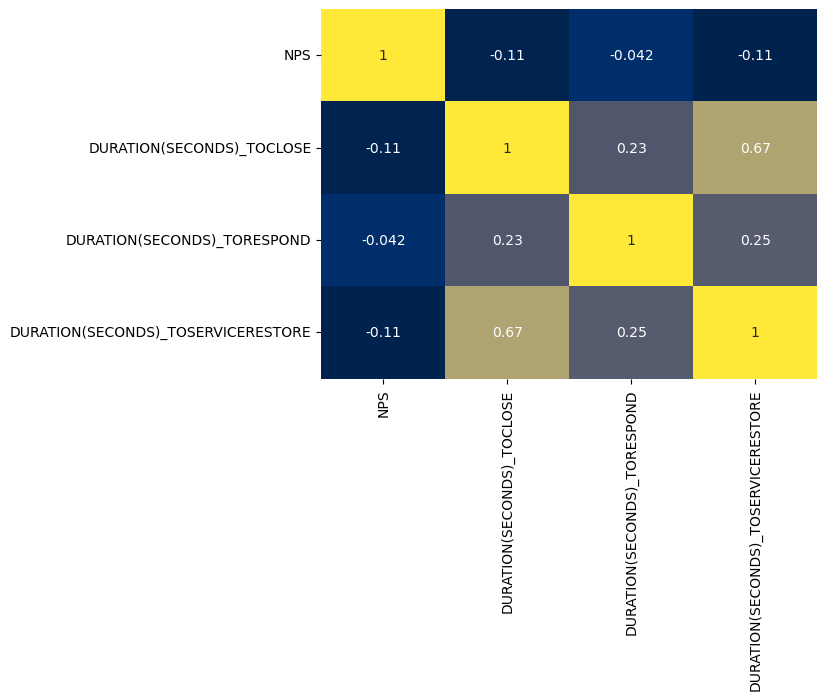

In [145]:
sns.heatmap(DF[["NPS",
                "DURATION(SECONDS)_TOCLOSE",
                "DURATION(SECONDS)_TORESPOND",
                "DURATION(SECONDS)_TOSERVICERESTORE"]].corr(),
            cbar=False,
            cmap='cividis',
            annot=True
           )



### Getting Month Year Dates

In [92]:
# UI Friendly version

DF["CASE_CLOSED_MONTHYEAR"] = \
DF['CASE_CLOSED_DATETIME'].dt.month_name().str[:3] + "'" \
+ DF['CASE_CLOSED_DATETIME'].dt.year.astype(str).str[-2:]

DF["CASE_CLOSED_MONTHYEAR"].head()

0    Apr'18
1    Apr'18
2    Jul'18
3    May'18
4    Mar'18
Name: CASE_CLOSED_MONTHYEAR, dtype: object

In [93]:
# Jupyter Notebook friendly

DF["CASE_CLOSED_MONTHYEAR"] = pd.to_datetime(DF["CASE_CLOSED_DATETIME"], format="%m %Y").dt.strftime('%Y-%m')

In [90]:
DF.groupby(["CASE_CLOSED_MONTHYEAR"])["FEEDBACK_RATING"].agg(["count","mean"]).reset_index().sort_values(by="CASE_CLOSED_MONTHYEAR")

,CASE_CLOSED_MONTHYEAR,count,mean
0,2018-01,4698,8.888889
1,2018-02,4431,8.889867
2,2018-03,4765,8.971878
3,2018-04,4693,8.916684
4,2018-05,4963,8.919807
5,2018-06,4700,8.921064
6,2018-07,5277,8.964184
7,2018-08,5240,8.981489
8,2018-09,4459,8.972191
9,2018-10,5216,8.956097
